In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2

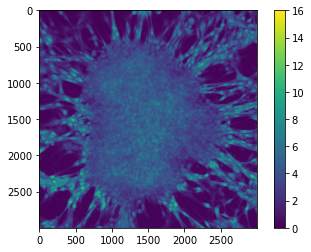

In [97]:
dapi_slice_path = "D:\Work_Experience\Franco_Lab\data\hmp_paper\Image_7_COXI_COXII\DAPI\Image_7_COXI_COXII_Z_Stack_z45.tif"
dapi_slice = cv2.cvtColor(cv2.imread(dapi_slice_path), cv2.COLOR_BGR2GRAY)
plt.imshow(dapi_slice)
plt.colorbar()

In [99]:
dapi_slice

array([[1, 1, 0, ..., 2, 1, 1],
       [1, 1, 1, ..., 2, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [3, 2, 4, ..., 0, 0, 0],
       [3, 5, 4, ..., 0, 1, 0],
       [4, 2, 4, ..., 0, 1, 0]], dtype=uint8)

In [107]:
dapi_slice[dapi_slice > 0] = 1

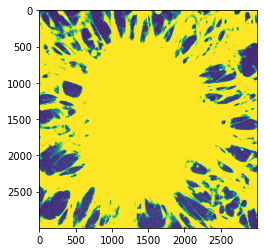

In [109]:
plt.imshow(dapi_slice)

In [11]:
import os
dapi_slice_paths = []
for root, dirs, files in os.walk(os.path.dirname(dapi_slice_path)):
    for f in files:
        if '.tif' in f:
            dapi_slice_paths.append(os.path.join(root, f))
dapi_slice_paths[0], dapi_slice_paths[-1]        

('D:\\Work_Experience\\Franco_Lab\\data\\hmp_paper\\Image_7_COXI_COXII\\DAPI\\Image_7_COXI_COXII_Z_Stack_z00.tif',
 'D:\\Work_Experience\\Franco_Lab\\data\\hmp_paper\\Image_7_COXI_COXII\\DAPI\\Image_7_COXI_COXII_Z_Stack_z52.tif')

In [116]:
slice_bool_cumulative = np.empty(dapi_slice.shape, dtype = np.uint8)
outpath = "D:\\Work_Experience\\Franco_Lab\\3d_heatmap\\no_peripheral_paper_hmp\\periphery_exclusion_inquiry"
for idx, slice_path in enumerate(dapi_slice_paths):
    dapi_slice = cv2.cvtColor(cv2.imread(slice_path), cv2.COLOR_BGR2GRAY)
    # plt.imshow(dapi_slice)
    # plt.colorbar()
    # plt.savefig(os.path.join(outpath, f"z{idx}_dapi.png"))
    # plt.close()
    dapi_slice[dapi_slice > 0] = 1
    slice_bool_cumulative = slice_bool_cumulative + dapi_slice
    # plt.imshow(slice_bool_cumulative)
    # plt.colorbar()
    # plt.savefig(os.path.join(outpath, f"z{idx}_cumu.png"))
    # plt.close()

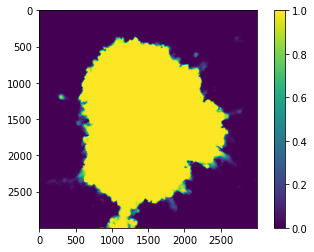

In [136]:
final_cumulative = slice_bool_cumulative / len(dapi_slice_paths)
bool_cumulative = final_cumulative
bool_cumulative[final_cumulative >= 0.85] = 1
bool_cumulative[final_cumulative < 0.85] = 0
plt.imshow(bool_cumulative)
plt.colorbar()

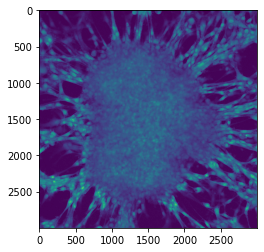

In [137]:
dapi_slice = cv2.cvtColor(cv2.imread(dapi_slice_path), cv2.COLOR_BGR2GRAY)
plt.imshow(dapi_slice)

In [138]:
dapi_slice_float = dapi_slice.flatten().astype(float)
dapi_slice_float[dapi_slice_float < 10] = np.nan
np.nanmean(dapi_slice_float)

10.542565236853886

In [139]:
dapi_slice_with_boundary = dapi_slice.astype(float)
dapi_slice_with_boundary[bool_cumulative == 0] = np.nan
np.nanmean(dapi_slice_with_boundary.flatten())

3.9305559113287876